In [1]:
import tensorflow as tf
from Util import calc_coverage
import random
import time
from tqdm import tqdm
from Layer_Util import addActivation, addAverPool1D, addAverPool2D, addAverPool3D, addBatchNorm, addConv1D, addConv2D, addConv2DTranspose, addConv3D, addConv3DTranspose, addDense, addDepthwiseConv2D, addDropout, addFlatten, addGRU, addGRUCell, addGaussianDropout, addGaussianNoise, addGloAverPool1D, addGloAverPool2D, addGloAverPool3D, addGloMaxPool1D, addGloMaxPool2D, addGloMaxPool3D, addLSTM, addLSTMCell, addLayerNormal, addLeakyReLU, addLocallyConnected1D, addLocallyConnected2D, addMaxPool, addReLU, addRepeatVector, addSeparableConv1D, addSeparableConv2D, addSimpleRNN, addSimpleRNNCell, addSpatialDropout1D, addSpatialDropout2D, addSpatialDropout3D, addThresholdedReLU, addZeroPadd

In [2]:
tf.__version__

'2.7.0'

In [3]:
alexnet_model = tf.keras.models.load_model('./alexnet-cifar10_origin.h5')

In [5]:
alexnet_model.get_config()

{'name': 'sequential_1',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 32, 32, 3),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'conv2d_1_input'}},
  {'class_name': 'Conv2D',
   'config': {'name': 'conv2d_1',
    'trainable': True,
    'batch_input_shape': (None, 32, 32, 3),
    'dtype': 'float32',
    'filters': 96,
    'kernel_size': (3, 3),
    'strides': (2, 2),
    'padding': 'same',
    'data_format': 'channels_last',
    'dilation_rate': (1, 1),
    'groups': 1,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'VarianceScaling',
     'config': {'scale': 1.0,
      'mode': 'fan_avg',
      'distribution': 'uniform',
      'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 

In [28]:
tf.debugging.set_log_device_placement(True)

# Create some tensors
a = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
b = tf.constant([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])
c = tf.matmul(a, b)

print(c)

Executing op MatMul in device /job:localhost/replica:0/task:0/device:CPU:0
tf.Tensor(
[[22. 28.]
 [49. 64.]], shape=(2, 2), dtype=float32)


In [77]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data() 
test_model = tf.keras.Sequential()
s=2
test_model.add(tf.keras.layers.InputLayer(input_shape=(32, 32, 3)))#
test_model.add(addGaussianDropout(15, seed = s))
test_model.add(addGaussianNoise(16, seed = s))
test_model.add(addZeroPadd(7, seed = s))
test_model.add(addZeroPadd(417, seed = s))
test_model.add(addConv2D(2, seed = s))
#test_model.add(addConv1D(11, seed = s))
test_model.add(addBatchNorm(3, seed = s))
test_model.add(addMaxPool(4, seed = s))
test_model.add(addDropout(5, seed = s))
test_model.add(addActivation(6, seed = s))
test_model.add(addLayerNormal(23, seed = s))
test_model.add(addDepthwiseConv2D(13))
# test_model.add(addAverPool2D(9, seed = s))

test_model.add(addGloMaxPool2D(21, seed = s))
test_model.add(addReshape(test_model, 3))
test_model.add(addGloAverPool2D(18))

test_model.add(addReshape(test_model, 4))
test_model.add(addAverPool3D(10))
test_model.add(addReshape(test_model, 4))
test_model.add(addConv3D(12))
test_model.add(addReshape(test_model, 4))
test_model.add(addGloAverPool3D(19))
test_model.add(addReshape(test_model, 2))
test_model.add(addGloMaxPool1D(20))
test_model.add(addReshape(test_model, 4))
test_model.add(addGloMaxPool3D(22))

test_model.add(addFlatten(14, seed = s))
test_model.add(addDense(1, seed = s))

In [61]:
test_table = Util.calc_coverage(test_model, x_test[:1])
print(Util.total_lines(test_table))

5363


In [6]:
def create_n_pred(seed, testdata):
    model = tf.keras.Sequential()
    
    model.add(tf.keras.layers.InputLayer(input_shape=(32, 32, 3)))#
    model.add(addGaussianDropout(15, seed = seed))
    model.add(addGaussianNoise(16, seed = seed))
    model.add(addZeroPadd(7, seed = seed))
    model.add(addZeroPadd(417, seed = seed))
    model.add(addConv2D(2, seed = seed))
    #     model.add(addConv1D(11, seed = seed))
    model.add(addBatchNorm(3, seed = seed))
    model.add(addMaxPool(4, seed = seed))
    model.add(addDropout(5, seed = seed))
    model.add(addActivation(6, seed = seed))
    model.add(addLayerNormal(23, seed = seed))
    model.add(addDepthwiseConv2D(13, seed = seed))
    model.add(addAverPool2D(9, seed = seed))

    model.add(addGloMaxPool2D(21, seed = seed))
    AddDimTo(model, 3)
    model.add(addGloAverPool2D(18, seed = seed))

    AddDimTo(model, 4)
    model.add(addAverPool3D(10, seed = seed))
    AddDimTo(model, 4)
    model.add(addConv3D(12, seed = seed))
    AddDimTo(model, 4)
    model.add(addGloAverPool3D(19, seed = seed))
    AddDimTo(model, 2)
    model.add(addGloMaxPool1D(20, seed = seed))
    AddDimTo(model, 4)
    model.add(addGloMaxPool3D(22, seed = seed))

    model.add(addFlatten(14, seed = seed))
    model.add(addDense(1, seed = seed))
    
    return Util.calc_coverage(model, testdata)
    

In [71]:
TOTAL_MODEL = 100
sucess_list = []
failed_seed=[]

In [72]:
for i in tqdm(range(TOTAL_MODEL)):
#     seed = int(random.random()*10000)
    seed = i
    try:
        sucess_list.append(create_n_pred(seed, x_test[:1]))
    except Exception:
        failed_seed.append(i)
        pass

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [04:47<00:00,  2.87s/it]


In [73]:
total = []
delta = []
for _ in range(len(sucess_list)):
    total.append(Util.total_lines(sucess_list[_]))
    delta.append(Util.delta_lines(sucess_list[_], sucess_list[0]))

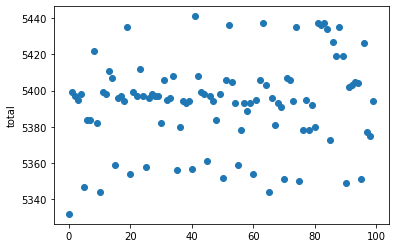

In [74]:
import matplotlib.pyplot as plt

x = range(len(sucess_list))

plt.scatter(x,total)
plt.ylabel("total")
plt.show()

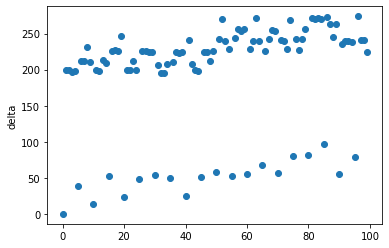

In [75]:
plt.scatter(x,delta)
plt.ylabel("delta")
plt.show()